In [1]:
## Impot the requitred libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
## Define the class to handle the fu,ctionalities of the program
class HoughLineCircleDetection:
    def __init__(self, path):
        self.image_path = path
        self.image = cv.imread(self.image_path)
## Method for line detection
    def line_detection(self):
        """
        hough line detection based out of canny edge detection
        """
        # Convert the image to gray-scale
        gray = cv.cvtColor(self.image, cv.COLOR_BGR2GRAY)
        # Using the canny detector, locate the image's edges. 
        edges = cv.Canny(gray, 50, 150, apertureSize=3)
        ##  Detect lines using the probabilistic Hough transform
        # Locate points that form a line. 
        lines = cv.HoughLinesP(edges, 1, np.pi/180, 100, 100, 10)
        # Draw lines on the image 
        for line in lines:
                x1, y1, x2, y2 = line[0]
                cv.line(self.image, (x1, y1), (x2, y2), (0, 0, 255), 2)
                # Show result
        cv.imwrite(os.path.join("houghlinesp.jpg"), self.image)

    def circle_detection(self):
        """ hough circle detection based out of canny circle detection"""
          ## Convert to gray-scale
        gray = cv.cvtColor(self.image, cv.COLOR_BGR2GRAY)
        # Blur the image for noice reduction. 
        img = cv.medianBlur(gray, 5)
        cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
        #hough transform application on the image
        circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 50,
                                  param1=50, param2=30, minRadius=0, maxRadius=0)
        # Draw detected circles
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # draw the center of the circle
            cv.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
        cv.imwrite(os.path.join("detected_circles.jpg"), cimg)




In [3]:
# Hough Transforms for Line and circle
image_path_src = os.path.join("test.jpg")
hough_object = HoughLineCircleDetection(image_path_src)
hough_object.line_detection()
hough_object.circle_detection()

In [4]:
image0 = cv.imread("test.jpg")
image1 = cv.imread("houghlinesp.jpg")
image2 = cv.imread("detected_circles.jpg")


In [5]:
import matplotlib.pyplot as plt
def plt_imshow(image):
	# convert the image frame BGR to RGB color space and display it
	image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.grid(False)
	plt.show()

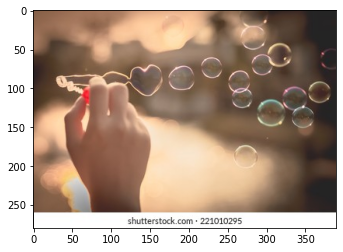

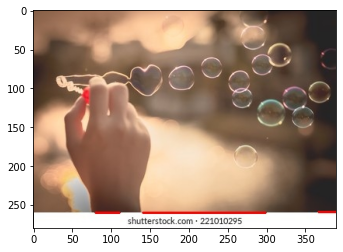

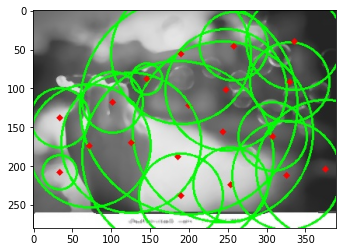

In [6]:
plt_imshow(image0)
plt_imshow(image1)
plt_imshow(image2)